# Neural & Behavioral Modeling - Week 3 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Dynamic Systems

### 1.1 Love Equations (Romeo ❤ Juliet ?)

Strogatz, S. H. (1988). Love affairs and differential equations. Mathematics Magazine, 61(1), 35.

Most general form:
    
$$ dr/dt = a_{11} r + a_{12} j $$
$$ dj/dt = a_{21} r + a_{22} j $$

where r(t)=Romeo's love/hate for Juliet at time t & j(t)=Juliet's love/hate for Romeo at time t.

A specific case in the paper is:

$$ dr/dt =  - a *j $$
$$ dj/dt =  b* r $$

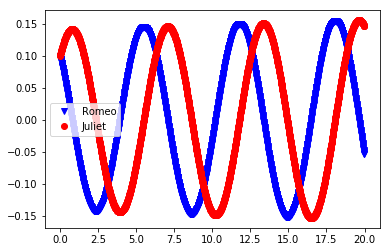

In [2]:
a,b=1,1 # Model parameters
r,j=[0.1],[0.1] # Initial values
dt=.01 # step size for numerical integration
t=arange(0,20,dt) # integration period
for i in t:
    r1,j1=r[-1],j[-1], # the last element
    r2=r1-dt*a*j1 # Euler integration
    j2=j1+dt*b*r1 # Euler integration
    r.append(r2)
    j.append(j2)
plot(t,r[0:-1],'bv') # Romeo
plot(t,j[0:-1],'ro') # Juliet
legend(['Romeo','Juliet']);

### 1.2 Predator-Prey Model (a.k.a. Lotka-Volterra Equations)
<img src="http://www.scholarpedia.org/w/images/c/cc/Hoppensteadt_pp.jpg" width=50%>

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, nonlinear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

Prey (e.g., rabbits): $$dx/dt = \alpha x - \beta xy = x (\alpha - \beta y)$$

Predator (e.g., foxes): $$dy/dt = \delta xy - \gamma y = y(\delta x -\gamma)$$

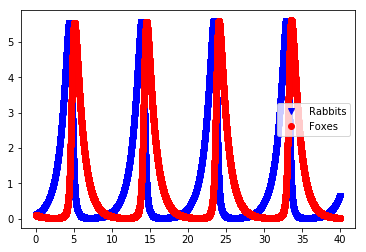

In [3]:
a,b,d,r=1,1,1,1 # Model parameters
x,y=[0.1],[0.1] # Initial values
dt=.001 # step size for numerical integration
t=arange(0,40,dt) # integration period
for i in t:
    x1,y1=x[-1],y[-1], # the last element
    x2=x1+dt*(a*x1-b*x1*y1) # Euler integration
    y2=y1+dt*(d*x1*y1-r*y1) # Euler integration
    x.append(x2)
    y.append(y2)
plot(t,x[0:-1],'bv') 
plot(t,y[0:-1],'ro')
legend(['Rabbits','Foxes']);

## 2 System Archetypes

These are the 9 system archetypes described in:
    
Senge, P. M. (2006). The fifth discipline: The art and practice of the learning organization. Broadway Business. [citation: 54262]

These simulations were ported from STELLA/iThink to Python. Most model parameters and coefficients were preserved unless the original version contained a GRAPH function, which was essentially a look-up table.

### 2.1 Escalation (富者愈富)

Two activities compete for limited support or resources. The more successful one becomes, the more support it gains, thereby starving the other.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/67/Success_to_the_successful.PNG">

Lesson: Look for the overarching goal for balanced achievement of both choices. In some cases, break or weaken the coupling between the two, so that they do not compete for the same limited resource (this is desirable in cases where the coupling is inadvertent and creates an unhealthy competition for resources).

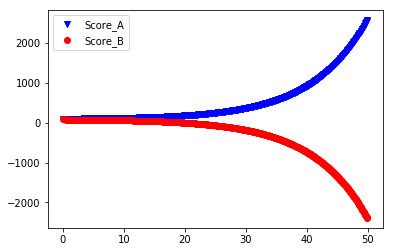

In [4]:
# Note: The origianl version used an allocation look-up table as a function of gap_AB
ResourceTot=10 # Model parameter
Score_A,Score_B=[100],[80] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,50,dt) # integration period
for i in t:
    Score_A1,Score_B1=Score_A[-1],Score_B[-1] # the last element
    ResourceA=ResourceTot*(Score_A1-Score_B1)/(Score_A1+Score_B1) # Try Score_A1/(Score_A1+Score_B1)
    ResourceB=ResourceTot*(Score_B1-Score_A1)/(Score_A1+Score_B1) # Try Score_B1/(Score_A1+Score_B1)
    Score_A2=Score_A1+dt*ResourceA # Euler integration
    Score_B2=Score_B1+dt*ResourceB # Euler integration
    Score_A.append(Score_A2)
    Score_B.append(Score_B2)
plot(t,Score_A[0:-1],'bv')
plot(t,Score_B[0:-1],'ro')
legend(['Score_A','Score_B']);

### 2.2 Tragedy of the Commons (公地的悲劇)

Individuals use a commonly available but limited resource solely on the basis of individual need. At first they are rewarded for using it; eventually, they get diminishing returns, which causes them to intensify their efforts. Eventually, the resource is either significantly depleted, eroded, or entirely used up.
 
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/Tragedy_of_the_commons.PNG">

Lesson: Manage the "commons," either through educating everyone and creating forms of self-regulation and peer pressure, or through an official regulating mechanism, ideally designed by participants.

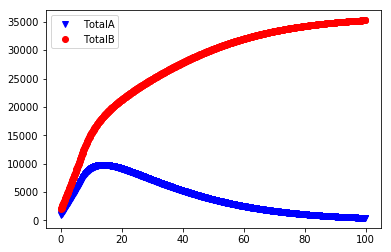

In [5]:
# Note: can't reproduce the results by exactly the same equations
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);

### 2.3 Limits to growth

A process feeds on itself to produce a period of accelerating growth or expansion. Then the growth begins to slow (often inexplicably to the participants in the system) and eventually comes to a halt, and may even reverse itself and begin an accelerating collapse.

The growth phase is caused by a reinforcing feedback process (or by several reinforcing feedback processes). The slowing arises due to a balancing process brought into play as a "limit" is approached. The limit can be a resource constraint, or an external or internal response to growth. The accelerating collapse (when it occurs) arises from the reinforcing process operating in reverse, to generate more and more contraction.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Limits_to_growth.PNG">

Lesson: Don't push on the reinforcing (growth) process, remove (or weaken) the source of limitation.

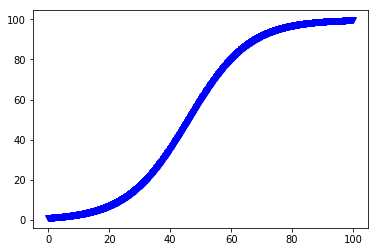

In [6]:
limiting_condition=100 # Upper bound
Condition=[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    Condition1=Condition[-1] # the last element
    growing_action=0.1*Condition1 # excitation
    slowing_strength=Condition1/limiting_condition
    slowing_action=0.1*Condition1*slowing_strength # inhibition
    Condition2=Condition1+dt*(growing_action-slowing_action) # Euler integration
    Condition.append(Condition2)
plot(t,Condition[0:-1],'bv');

### 2.4 Growth and underinvestment (投資不足)

Growth approaches a limit which can be eliminated or pushed into the future if the firm, or individual, invests in additional "capacity." But the investment must be aggressive and sufficiently rapid to forestall reduced growth, or else it will never get made. Oftentimes, key goals or performance standards are lowered to justify underinvestment. When this happens, there is a self-fulfilling prophecy where lower goals lead to lower expectations, which are then borne out by poor performance caused by underinvestment.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/93/Growth_and_underinvestment.PNG">

Lesson: If there is a genuine potential for growth, build capacity in advance of demand, as a strategy for creating demand. Hold the vision, especially as regards assessing key performance standards and evaluating whether capacity to meet potential demand is adequate.

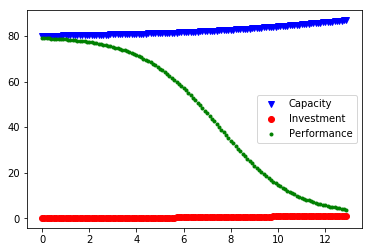

In [7]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    growing_action=0.01*Demand1
    performance=Capacity1-Demand1
    change_rate=0.75*growing_action*performance
    perf.append(performance)
    growth_and_underinverstment=performance_standard-performance
    investment=0.01*growth_and_underinverstment
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration
    Demand2=Demand1+dt*change_rate # Euler integration
    Capacity.append(Capacity2)
    Demand.append(Demand2)
plot(t,Capacity[0:-1],'bv')
plot(t,inves,'ro')
plot(t,perf,'g.')
legend(['Capacity','Investment','Performance']);

### 2.5 Balancing Process with Delay

A person, a group, or an organization, acting toward a goal, adjusts their behavior in response to delayed feedback. If they are not conscious of the delay, they end up taking more corrective action than needed, or (sometimes) just giving up because they cannot see that any progress is being made.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Balancing_process_with_delay.PNG">

Lesson: In a sluggish system, aggressiveness produces instability. Either be patient or make the system more responsive.

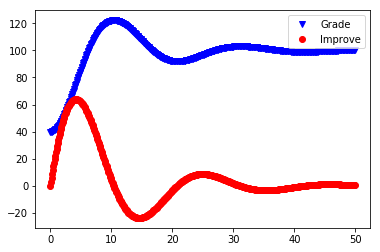

In [8]:
Goal=100 # Model parameter
improve_time=5 # unit=dt
Grade=[40] # actual condition
Improve=[0]
dt=.1 # step size for numerical integration
t=arange(0,50,dt) # integration period
for i in t:
    Grade1,Improve1=Grade[-1],Improve[-1] # the last element
    improve_process=Improve1/improve_time
    Grade2=Grade1+dt*improve_process # Euler integration
    Improve2=Improve1+dt*(-improve_process+0.5*(Goal-Grade1)) # Euler integration
    Grade.append(Grade2)
    Improve.append(Improve2)
plot(t,Grade[0:-1],'bv')
plot(t,Improve[0:-1],'ro')
legend(['Grade','Improve']);

### 2.6 Escalation (惡性競爭)

Two people or organizations each see their welfare as depending on a relative advantage over the other. Whenever one side gets ahead, the other is more threatened, leading it to act more aggressively to reestablish its advantage, which threatens the first, increasing its aggressiveness, and so on. Often each side sees its own aggressive behavior as a defensive response to the other's aggression; but each side acting "in defense" results in a buildup that goes far beyond either side's desires.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Escalation.PNG">

Lesson: Look for a way for both sides to "win," or to achieve their objectives. In many instances, one side can unilaterally reverse the vicious spiral by taking overtly aggressive "peaceful" actions that cause the other to feel less threatened.

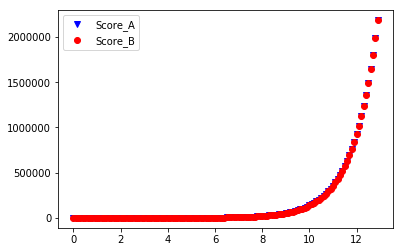

In [9]:
Score_A,Score_B=[10],[10] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
for i in t:
    Score_A1,Score_B1=Score_A[-1],Score_B[-1] # the last element
    action_A=Score_B1*2-Score_A1 # B threaten to A
    action_B=Score_A1*2-Score_B1 # A threaten to B 
    Score_A2=Score_A1+dt*action_A # Euler integration
    Score_B2=Score_B1+dt*action_B # Euler integration
    Score_A.append(Score_A2)
    Score_B.append(Score_B2)
plot(t,Score_A[0:-1],'bv')
plot(t,Score_B[0:-1],'ro')
legend(['Score_A','Score_B']);

### 2.7 Eroding Goals

A shifting the burden type of structure in which the short-term solution involves letting a long-term, fundamental goal decline.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Eroding_goals.PNG">

Lesson: Hold the vision.

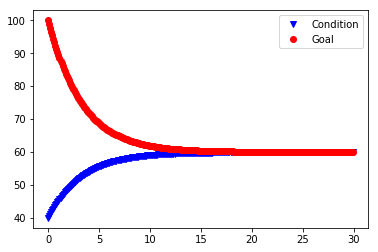

In [10]:
Condition,Goal=[40],[100] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,30,dt) # integration period
for i in t:
    Condition1,Goal1=Condition[-1],Goal[-1] # the last element
    gap=Goal1-Condition1
    action_to_improve_conditions=0.1*gap
    pressure_to_adjust_goal=0.2*gap
    Condition2=Condition1+dt*action_to_improve_conditions # Euler integration
    Goal2=Goal1-dt*pressure_to_adjust_goal # Euler integration
    Condition.append(Condition2) 
    Goal.append(Goal2)
plot(t,Condition[0:-1],'bv')
plot(t,Goal[0:-1],'ro')
legend(['Condition','Goal']);

### 2.8 Shifting the Burdern (捨本逐末)

A short-term "solution" is used to correct a problem, with seemingly positive immediate results. As this correction is used more and more, more fundamental long-term corrective measures are used less and less. Over time, the capabilities for the fundamental solution may atrophy or become disabled, leading to even greater reliance on the symptomatic solution.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Shifting_the_burden.PNG">

Lesson: Focus on the fundamental solution. If symptomatic solution is imperative (because of delays in fundamental solution), use it to gain time while working on the fundamental solution.

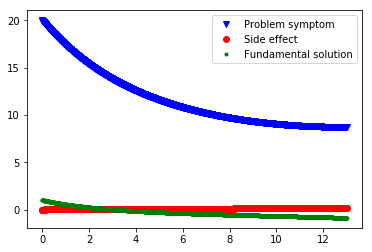

In [11]:
Problem,Side=[20],[0] # Initial values
dt=.01 # step size for numerical integration
t=arange(0,13,dt) # integration period
fundamental=[]
for i in t:
    Problem1,Side1=Problem[-1],Side[-1] # the last element
    symptomatic_solution=0.1*Problem1
    fundamental_solution=(0.05-Side1)*Problem1
    fundamental.append(fundamental_solution)
    Problem2=Problem1-dt*(symptomatic_solution+fundamental_solution) # Euler integration
    Side2=Side1+dt*0.01*symptomatic_solution # Euler integration
    Problem.append(Problem2)
    Side.append(Side2)
plot(t,Problem[0:-1],'bv')
plot(t,Side[0:-1],'ro')
plot(t,fundamental,'g.')
legend(['Problem symptom','Side effect','Fundamental solution']);

### 2.9 Fixes that Fail (飲鴆止渴)

A fix, effective in the short term, has unforeseen long-term consequences which may require even more use of the same fix.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/40/Fixes_that_fail.PNG">

Lesson: Maintain focus on the long term. Disregard short-term "fix," if feasible, or use it only to "buy time" while working on long-term remedy.

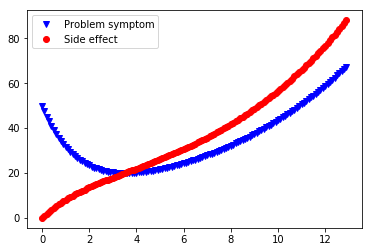

In [12]:
Problem,Side=[50],[0] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
for i in t:
    Problem1,Side1=Problem[-1],Side[-1] # the last element
    long_term_consequences=0.5*Side1
    fix=0.5*Problem1
    change_rate=0.4*fix
    Problem2=Problem1+dt*(long_term_consequences-fix) # Euler integration
    Side2=Side1+dt*change_rate # Euler integration
    Problem.append(Problem2)
    Side.append(Side2)
plot(t,Problem[0:-1],'bv')
plot(t,Side[0:-1],'ro')
legend(['Problem symptom','Side effect']);